# Cloud Computing Computational Notebook
## BioMetrica Analytics: Enterprise Biomarker Data Management
![logo](logo.jpg)

## 1. Introduction
### 1.1 Company Overview
BioMetrica Analytics is a large corporation specialising in enterprise biomarker data management systems for pharmaceutical and healthcare organidations. Established in 2010, the company has grown substantially, now serving over 250 clients across the globe including major pharmaceutical companies, research institutions, and clinical trial organisations.

The company's flagship platform enables the collection, storage, analysis, and visualisation of complex biomarker data collected during clinical trials and research studies. This critical data includes genomic markers, proteomic analyses, metabolic indicators, and other biological measurements that track disease progression and drug efficacy.

Currently, BioMetrica Analytics operates with an on-premises infrastructure consisting of multiple data centers. However, due to rapid growth, increasing data volumes, and the need for more scalable and flexible solutions, the company is considering adopting cloud computing technology.

### 1.2 Business Requirements
BioMetrica Analytics requires:
- Scalable infrastructure to handle variable workloads during clinical trial periods
- Containerisation for consistent deployment across environments
- Secure data storage complying with healthcare regulations (HIPAA, GDPR, etc.)
- High-performance computing for complex biostatistical analysis
- Web application deployment with global accessibility
- Machine learning capabilities for predictive analytics

## 2. Introduction to Cloud Computing
### 2.1 Definition and Overview
Cloud computing is a model for enabling convenient, on-demand network access to a shared pool of configurable computing resources (e.g., networks, servers, storage, applications, and services) that can be rapidly provisioned and released with minimal management effort or service provider interaction.

The cloud model is composed of five essential characteristics:
- On-demand self-service
- Broad network access
- Resource pooling/multi-tenancy
- Rapid elasticity
- Measured service

### 2.2 Virtualisation Explained
Virtualisation is the fundamental technology enabling cloud computing. It involves creating a virtual version of computing resources, such as servers, storage devices, network resources, or operating systems.

Key aspects of virtualisation include:
- **Separation** - of resources and services from the physical system
- **Partitioning** – allowing a single physical system to provide many applications and operating systems
- **Isolation** – ensuring each virtual machine operates independently
- **Encapsulation** – packaging virtual machines as discrete entities

Hypervisors, both Type 1 (native) and Type 2 (hosted), enable this virtualisation by managing the allocation of physical resources to virtual environments.

### 2.3 Cloud Provider Offerings
Major cloud providers such as AWS, Microsoft Azure, and Google Cloud Platform offer a comprehensive suite of services including:

- Compute services (virtual machines, containers, serverless functions)
- Storage solutions (object storage, block storage, file systems)
- Database services (relational, NoSQL, time-series databases)
- Networking capabilities (virtual networks, load balancers, CDN)
- Analytics and machine learning platforms
- Identity and security services
- DevOps and automation tools

## 3. Cloud Recommendations for BioMetrica Analytics
### 3.1 Cloud Service Model Recommendations
#### 3.1.1 Recommended Service Models

**Recommendation:** A hybrid approach utilising Infrastucture as a Service (IaaS), Platform as a Service (PaaS), and Software as a Service (SaaS) components

**Justification:** BioMetrica Analytics would benefit from:
- **IaaS** for core infrastructure needs, providing control over operating systems and configurations while offloading hardware management
- **PaaS** for application development and data analytics platforms, accelerating development cycles and enabling advanced analytics without managing underlying infrastructure
- **SaaS** for standard business functions like email, collaboration tools, and customer relationship management

The hybrid approach aligns with BioMetrica's need to maintain control over sensitive data processing while leveraging cloud efficiencies for scalability and innovation.

### 3.2 Cloud Pattern Recommendations
#### 3.2.1 Recommended Cloud Patterns
#### Queue-based Load Leveling Pattern

**Recommendation:** Implement queue-based load leveling for handling variable workloads during clinical trial data processing

**Justification:** This pattern will help BioMetrica manage the inconsistent flow of data from clinical trials, ensuring system stability during peak processing times without overprovisioning resources

Example Implementation: Amazon SQS (Simple Queue Service) or Azure Service Bus could be deployed between the data ingestion layer and processing services. When clinical trial sites upload large batches of biomarker data, the queue would buffer these requests, allowing the processing servers to handle the workload at a consistent rate rather than scaling to accommodate temporary spikes.

#### Cache-Aside Pattern

Recommendation: Implement caching for frequently accessed biomarker reference data
Justification: Reduces database load and improves response times for researchers and analysts accessing common datasets
Example Implementation: Redis or Amazon ElastiCache could be implemented to store frequently accessed reference data such as standardized biomarker ranges, protocol definitions, and study metadata. The web application would first check this cache before querying the primary database, significantly improving performance for dashboard loads and common reports that researchers run multiple times daily.

#### Sharding Pattern

Recommendation: Implement database sharding for partitioning large biomarker datasets
Justification: Enables horizontal scaling of databases by client or by study, improving performance and maintaining isolation where needed
Example Implementation: MongoDB Atlas or Azure Cosmos DB could be configured with database shards organized by either pharmaceutical client or clinical study ID. This would allow BioMetrica to maintain separate physical storage for different clients' data while presenting a unified query interface. For instance, "Study_A" data might reside on one shard while "Study_B" on another, enabling parallel query processing and improved performance.

#### Gateway Aggregation Pattern

Recommendation: Implement API gateways to aggregate multiple backend service calls
Justification: Reduces client-to-service chattiness and provides a unified interface for the web application to access various microservices
Example Implementation: AWS API Gateway or Azure API Management could be deployed to create unified endpoints for BioMetrica's web application. For example, a single API call to "/patient/summary" could aggregate data from multiple backend services (demographic data, biomarker readings, clinical observations) into a single response, reducing network latency and simplifying the frontend code. This would be particularly valuable for the researchers' dashboards that need to present consolidated views of multimodal biomarker data.

## 3.3 Cloud Services Recommendations
### 3.3.1 Recommended Cloud Services
#### Containerization Services

Recommendation: Utilize containerization services for deploying the BioMetrica web application and analysis tools (e.g., Docker, Kubernetes)
Justification: Ensures consistency across development, testing, and production environments while enabling efficient scaling and deployment
Example Implementation: BioMetrica could containerize its web application and analysis services using Docker, orchestrated with Kubernetes through services like Amazon EKS (Elastic Kubernetes Service) or Azure Kubernetes Service (AKS). This would allow the company to package its complex biostatistical analysis tools with all required dependencies, ensuring consistent behavior across environments. For instance, specialized R packages for genomic analysis or Python libraries for machine learning could be bundled into containers, eliminating "works on my machine" issues between development and production.

#### Managed Database Services

Recommendation: Migrate to managed database services for both relational and NoSQL data (e.g., Amazon RDS, Azure SQL Database, Google Cloud Spanner)
Justification: Reduces administrative overhead while providing high availability, automated backups, and scaling capabilities
Example Implementation: BioMetrica could migrate its structured patient and trial data to Amazon RDS for PostgreSQL or Azure SQL Database, leveraging automated backups and point-in-time recovery capabilities essential for regulatory compliance. For schema-flexible biomarker data with varying attributes across different studies, a NoSQL solution like Amazon DynamoDB or Azure Cosmos DB would provide the necessary flexibility while maintaining ACID compliance for transactional integrity. The managed services would handle routine database administration tasks like patching, backups, and scaling, allowing BioMetrica's database team to focus on data modeling and query optimization instead of infrastructure management.

#### Object Storage Services

Recommendation: Implement object storage for raw biomarker data files and research documents (e.g., Amazon S3, Azure Blob Storage, Google Cloud Storage)
Justification: Provides cost-effective, scalable storage with fine-grained access controls and compliance features
Example Implementation: BioMetrica could use Amazon S3 or Azure Blob Storage with appropriate encryption and access controls to store raw instrument output files, clinical images, genomic sequencing data, and research documentation. Different storage tiers (e.g., S3 Standard, S3 Infrequent Access, S3 Glacier) could be employed based on data access patterns, with older completed trial data automatically transitioning to lower-cost cold storage. S3 Object Lock or Azure immutable storage policies could be configured to meet regulatory requirements for data immutability, ensuring that once biomarker readings are recorded, they cannot be altered—a critical feature for maintaining clinical trial data integrity and regulatory compliance.

#### Machine Learning Services

Recommendation: Utilize cloud-based machine learning services for predictive biomarker analysis (e.g., AWS SageMaker, Azure Machine Learning, Google AI Platform)
Justification: Offers pre-built models and scalable infrastructure for complex analyses without requiring specialized hardware
Example Implementation: BioMetrica could leverage Amazon SageMaker or Azure Machine Learning to build, train, and deploy machine learning models that predict treatment efficacy based on biomarker patterns or identify patient subgroups that might respond differently to experimental therapies. For example, a model could be trained on historical data to predict which patients are likely to show adverse reactions based on early biomarker changes, enabling proactive intervention. These platforms provide the necessary GPU/TPU acceleration for deep learning models analyzing complex biomarker interrelationships without requiring capital investment in specialized hardware. Additionally, services like AWS Comprehend Medical could be used to extract structured information from unstructured clinical notes to augment the structured biomarker data.

## 4. Key Issues in Cloud Computing
### 4.1 SWOT Analysis for BioMetrica Analytics

#### 4.1.1 Strengths
- **Scalability:** Ability to handle variable workloads during clinical trials
- **Reliability:** Improved uptime and disaster recovery capabilities
- **Flexibility:** Access to advanced technologies without capital investment

#### 4.1.2 Weaknesses
- **Data Ownership:** Concerns regarding control over sensitive healthcare data
- **Vendor Lock-in:** Potential dependency on specific cloud provider technologies
- **Compliance Challenges:** Maintaining regulatory compliance across cloud environments

#### 4.1.3 Opportunities
- **Innovation:** Access to cutting-edge analytics and machine learning capabilities
- **Global Reach:** Improved collaboration with research partners worldwide
- **Cost Optimisation:** Potential reduction in infrastructure maintenance costs

#### 4.1.4 Threats
- **Security:** Increased attack surface and data breach concerns
- **Regulatory Changes:** Evolving healthcare data regulations affecting cloud deployments
- **Cost Management:** Potential for unexpected costs without proper governance

### 4.2 Relevance to BioMetrica Analytics
The migration to cloud computing presents both significant opportunities and challenges for BioMetrica Analytics:

**Data Security and Compliance**
- As a healthcare data company, BioMetrica must ensure cloud deployments meet HIPAA, GDPR, and other regulatory requirements
- Implementation of encryption, access controls, and audit trails is essential
- Data residency requirements may necessitate multi-region deployments

**Cost Considerations**
- Current on-premises infrastructure represents significant capital investment
- Cloud migration offers operational expenditure model but requires careful management
- Elasticity capabilities align with variable workloads from clinical trial cycles

**Technical Integration**
- Legacy systems integration with cloud services requires careful planning
- Training and skills development needed for IT staff
- Hybrid approach allows phased migration to minimise disruption

## 5. Data Analysis Demonstration
### 5.1 Pandas DataFrame Example

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create sample biomarker data
np.random.seed(42)
dates = pd.date_range('2023-01-01', periods=100, freq='D')
studies = ['Study_A', 'Study_B', 'Study_C', 'Study_D']
biomarkers = ['Biomarker_1', 'Biomarker_2', 'Biomarker_3']

# Generate synthetic data
data = []
for date in dates:
    for study in studies:
        for biomarker in biomarkers:
            # Generate random values with different baselines for each biomarker
            if biomarker == 'Biomarker_1':
                value = np.random.normal(100, 15)
            elif biomarker == 'Biomarker_2':
                value = np.random.normal(50, 10)
            else:
                value = np.random.normal(75, 20)
                
            # Add some trend to make the data more interesting
            day_factor = (date - dates[0]).days / 30  # Months since start
            
            # Different trends for different studies
            if study == 'Study_A':
                trend = day_factor * 5
            elif study == 'Study_B':
                trend = day_factor * 2
            elif study == 'Study_C':
                trend = -day_factor * 3
            else:
                trend = np.sin(day_factor) * 10
                
            final_value = value + trend
            
            # Add to data
            data.append({
                'Date': date,
                'Study': study,
                'Biomarker': biomarker,
                'Value': final_value,
                'Patient_Count': np.random.randint(10, 100)
            })

# Create DataFrame
biomarker_df = pd.DataFrame(data)

# Display the first few rows
print("Sample Biomarker Data:")
biomarker_df.head()

Sample Biomarker Data:


,Date,Study,Biomarker,Value,Patient_Count
0,2023-01-01,Study_A,Biomarker_1,107.450712,81
1,2023-01-01,Study_A,Biomarker_2,48.617357,70
2,2023-01-01,Study_A,Biomarker_3,51.043871,96
3,2023-01-01,Study_B,Biomarker_1,132.124876,84
4,2023-01-01,Study_B,Biomarker_2,29.890371,33


### 5.2 Pivot Table Analysis

In [2]:
# Create a pivot table to analyse average biomarker values by study
pivot_study_biomarker = biomarker_df.pivot_table(
    values='Value',
    index='Study',
    columns='Biomarker',
    aggfunc='mean'
)

print("Pivot Table - Average Biomarker Values by Study:")
pivot_study_biomarker

# Create a pivot table to analyse trends over time
pivot_time_trends = biomarker_df.pivot_table(
    values='Value',
    index=pd.Grouper(key='Date', freq='W'),  # Weekly aggregation
    columns=['Study', 'Biomarker'],
    aggfunc='mean'
)

print("\nPivot Table - Weekly Biomarker Trends:")
pivot_time_trends.head()

Pivot Table - Average Biomarker Values by Study:

Pivot Table - Weekly Biomarker Trends:


Study          Study_A                             Study_B              \
Biomarker  Biomarker_1 Biomarker_2 Biomarker_3 Biomarker_1 Biomarker_2   
Date                                                                     
2023-01-01  107.450712   48.617357   51.043871  132.124876   29.890371   
2023-01-08   97.886474   50.846604   65.756922   99.141259   44.368012   
2023-01-15   99.129848   55.265234   57.432664  106.914674   53.225267   
2023-01-22  103.129341   53.091344   86.236084  100.016102   44.873952   
2023-01-29  109.645157   47.451110   70.345785  105.355831   52.199567   

Study                      Study_C                             Study_D  \
Biomarker  Biomarker_3 Biomarker_1 Biomarker_2 Biomarker_3 Biomarker_1   
Date                                                                     
2023-01-01   65.143932   92.957884   55.425600   63.572397   86.138757   
2023-01-08   85.094167   99.187174   50.715608   76.408956  102.368258   
2023-01-15   82.043176  100.971353   58.958365   85.516448  103.706827   
2023-01-22   82.885718  100.745979   52.091417   66.460928  104.465258   
2023-01-29   69.583789  102.936735   39.212322   78.751646  105.779968   

Study                               
Biomarker  Biomarker_2 Biomarker_3  
Date                                
2023-01-01   58.164451   44.522480  
2023-01-08   50.410859   81.427407  
2023-01-15   55.335357   75.808862  
2023-01-22   55.034216   84.015559  
2023-01-29   59.271849   83.824945

### 5.3 Data Visualisation

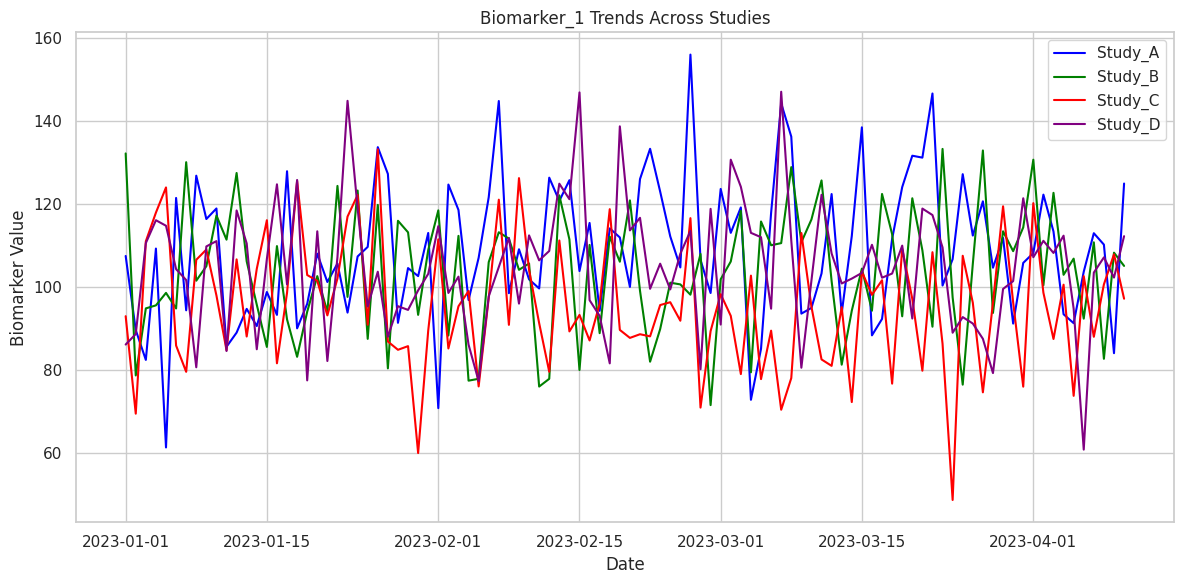

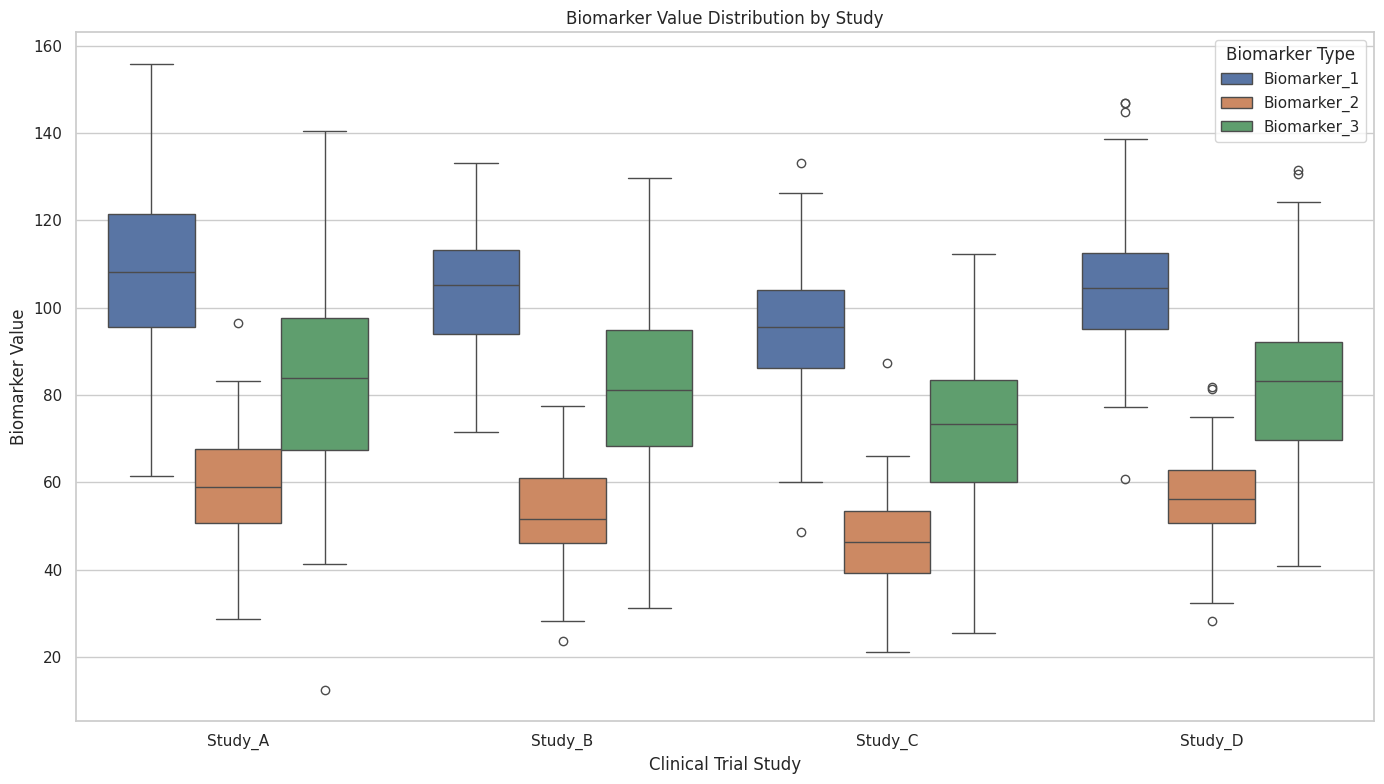

In [3]:
# Set the style for visualisations
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Create a time series plot for Biomarker_1 across different studies
study_colors = {'Study_A': 'blue', 'Study_B': 'green', 'Study_C': 'red', 'Study_D': 'purple'}

# Filter for just Biomarker_1
biomarker1_data = biomarker_df[biomarker_df['Biomarker'] == 'Biomarker_1']

# Group by date and study, then calculate mean
grouped_data = biomarker1_data.groupby(['Date', 'Study'])['Value'].mean().reset_index()

# Plot each study
for study in studies:
    study_data = grouped_data[grouped_data['Study'] == study]
    plt.plot(study_data['Date'], study_data['Value'], label=study, color=study_colors[study])

plt.title('Biomarker_1 Trends Across Studies')
plt.xlabel('Date')
plt.ylabel('Biomarker Value')
plt.legend()
plt.tight_layout()
plt.show()

# Create a comparison visualisation for all biomarkers
plt.figure(figsize=(14, 8))

sns.boxplot(x='Study', y='Value', hue='Biomarker', data=biomarker_df)
plt.title('Biomarker Value Distribution by Study')
plt.xlabel('Clinical Trial Study')
plt.ylabel('Biomarker Value')
plt.legend(title='Biomarker Type')
plt.tight_layout()
plt.show()

## 6. Provider Cost Analysis
### 6.1 Comparative Analysis of Cloud Providers

In [4]:
# Create data for cost comparison
providers = ['AWS', 'Azure', 'Google Cloud']
services = ['Compute', 'Storage', 'Database', 'ML Services', 'Data Transfer', 'Management Tools']

# Sample monthly costs for a medium-sized deployment (USD)
aws_costs = [12500, 4500, 5200, 3800, 2200, 1800]
azure_costs = [11800, 4800, 5600, 3200, 2400, 2000]
gcp_costs = [11200, 5000, 5100, 3600, 1900, 2100]

# Create DataFrame
cost_df = pd.DataFrame({
    'Service': services,
    'AWS': aws_costs,
    'Azure': azure_costs,
    'Google Cloud': gcp_costs
})

print("Monthly Cost Comparison by Provider (USD):")
cost_df

Monthly Cost Comparison by Provider (USD):


,Service,AWS,Azure,Google Cloud
0,Compute,12500,11800,11200
1,Storage,4500,4800,5000
2,Database,5200,5600,5100
3,ML Services,3800,3200,3600
4,Data Transfer,2200,2400,1900
5,Management Tools,1800,2000,2100


<Figure size 1200x800 with 0 Axes>

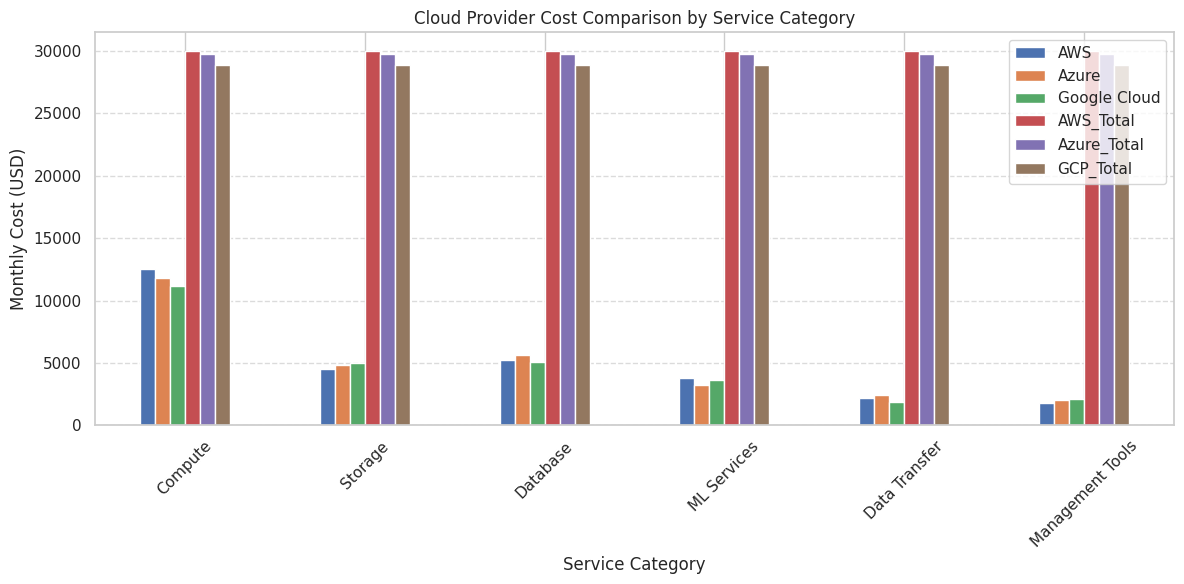


Total Monthly Costs:
AWS: $30,000
Azure: $29,800
Google Cloud: $28,900

3-Year Projected Costs (with 5.0% annual increase):
AWS: $94,575.00
Azure: $93,944.50
Google Cloud: $91,107.25


In [10]:
# Visualise the cost comparison
plt.figure(figsize=(12, 8))

# Create a bar chart
cost_df.set_index('Service').plot(kind='bar', figsize=(12, 6))
plt.title('Cloud Provider Cost Comparison by Service Category')
plt.xlabel('Service Category')
plt.ylabel('Monthly Cost (USD)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show();

# Calculate total costs
cost_df['AWS_Total'] = cost_df['AWS'].sum()
cost_df['Azure_Total'] = cost_df['Azure'].sum()
cost_df['GCP_Total'] = cost_df['Google Cloud'].sum()

print(f"\nTotal Monthly Costs:")
print(f"AWS: ${cost_df['AWS_Total'][0]:,}")
print(f"Azure: ${cost_df['Azure_Total'][0]:,}")
print(f"Google Cloud: ${cost_df['GCP_Total'][0]:,}")

# Projected 3-year costs with 5% annual increase
years = 3
annual_increase = 0.05

aws_projection = cost_df['AWS'].sum() * ((1+annual_increase)**(years-1) + (1+annual_increase)**(years-2) + (1+annual_increase)**(years-3))
azure_projection = cost_df['Azure'].sum() * ((1+annual_increase)**(years-1) + (1+annual_increase)**(years-2) + (1+annual_increase)**(years-3))
gcp_projection = cost_df['Google Cloud'].sum() * ((1+annual_increase)**(years-1) + (1+annual_increase)**(years-2) + (1+annual_increase)**(years-3))

print(f"\n3-Year Projected Costs (with {annual_increase*100}% annual increase):")
print(f"AWS: ${aws_projection:,.2f}")
print(f"Azure: ${azure_projection:,.2f}")
print(f"Google Cloud: ${gcp_projection:,.2f}")

## 7. Migration Strategy
### 7.1 Phased Implementation Approach
Based on the analysis and recommendations, BioMetrica Analytics should consider a phased approach to cloud adoption:

1. **Assessment Phase (2-3 months)**
   - Detailed audit of current applications and infrastructure
   - Identification of migration candidates and prioritisation
   - Security and compliance requirements mapping

2. **Pilot Phase (3-4 months)**
   - Migration of non-critical workloads to evaluate cloud performance
   - Implementation of selected cloud patterns on test environments
   - Staff training and skills development

3. **Core Infrastructure Migration (4-6 months)**
   - Establishment of cloud networking and security foundations
   - Implementation of identity management and access controls
   - Migration of data storage and database systems

4. **Application Migration (6-8 months)**
   - Containerisation of web applications
   - Refactoring of applications to leverage cloud-native features
   - Implementation of monitoring and management tools

5. **Optimisation Phase (Ongoing)**
   - Cost optimisation and resource right-sizing
   - Performance tuning and efficiency improvements
   - Implementation of advanced analytics and machine learning capabilities

### 7.2 Key Success Factors
To ensure a successful cloud migration, BioMetrica Analytics should focus on:

- Executive sponsorship and clear communication of cloud strategy
- Comprehensive training program for IT staff and end-users
- Robust security and compliance framework
- Detailed cost management and governance processes
- Regular review and optimisation of cloud resources

## 8. Conclusion
The transition to cloud computing offers BioMetrica Analytics significant opportunities to enhance scalability, improve performance, and accelerate innovation in biomarker data management. By adopting a hybrid approach with carefully selected cloud patterns and services, the company can address current infrastructure limitations while positioning itself for future growth.

The recommended approach balances the need for control over sensitive healthcare data with the benefits of cloud elasticity and advanced capabilities. Through a phased implementation strategy, BioMetrica can minimise disruption while systematically realising the benefits of cloud adoption.

As demonstrated through the data analysis examples, cloud-based analytics capabilities will enable BioMetrica to derive deeper insights from biomarker data, ultimately enhancing the value provided to pharmaceutical and healthcare clients.